<a href="https://colab.research.google.com/github/JairAlberto3945/JairAlberto3945/blob/main/Monte_Carlo_AcieryErr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Huerta Díaz Jair Alberto**

Método de Monte Carlo de Acierto y Error

In [53]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import scipy.integrate as spi

Definimos aqui la función a la que queremos estimar la integral.

In [54]:
# Definición de la función f(x) = √(arctan(x))
def f(x):
    return np.sqrt(np.arctan(x))

In [55]:
# Límites de integración
a, b = 0, 1  # Intervalo de integración

# Número de puntos aleatorios, se sugiere aumentar el valor de N para tener una mayor precisión
N = 10000

# Estimar el valor máximo de la función en el intervalo [a, b]
f_max = f(b)

Aqui vamos a generar los N números aleatorios dentro de los parámetros previamente establecidos.

In [66]:
# Generar N puntos aleatorios dentro del rectángulo [a, b] x [0, f_max]
x_rand = np.random.uniform(a, b, N)
y_rand = np.random.uniform(0, f_max, N)

In [68]:
# Contar cuántos puntos caen debajo de la curva
aciertos = np.sum(y_rand <= f(x_rand))

In [69]:
# Estimar el área bajo la curva
area_rectangulo = (b - a) * f_max
area_estimada = (aciertos / N) * area_rectangulo

In [70]:
# Cálculo del valor real de la integral con scipy para comparar
valor_real, error_real = spi.quad(f, a, b)

# Cálculo del error relativo porcentual
error_relativo = np.abs((valor_real - area_estimada) / valor_real) * 100

In [71]:
# Estimación de la integral y Error Relativo
print(f"Valor estimado de la integral: {area_estimada:.6f}")
print(f"Valor real de la integral: {valor_real:.6f}")
print(f"Error relativo: {error_relativo:.4f}%")


Valor estimado de la integral: 0.626208
Valor real de la integral: 0.629823
Error relativo: 0.5740%


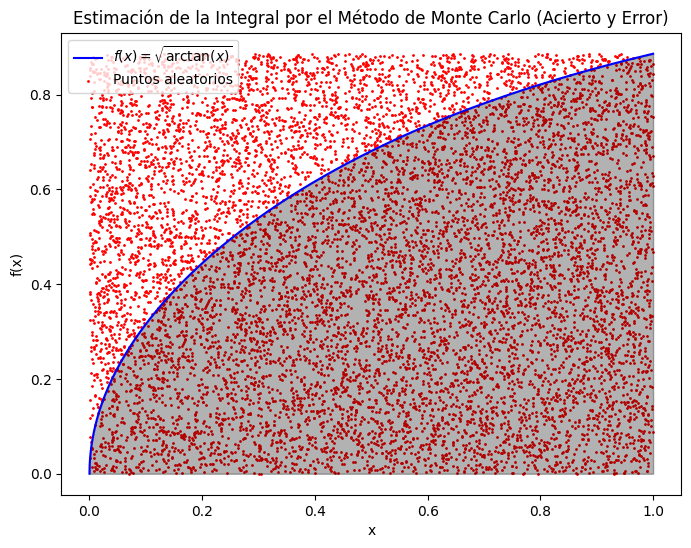

In [72]:
#Representación Gráfica
x_vals = np.linspace(a, b, 10000)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, color='blue', label=r'$f(x) = \sqrt{\arctan(x)}$')
plt.scatter(x_rand, y_rand, s=1, color='red', label='Puntos aleatorios')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='black')
plt.title('Estimación de la Integral por el Método de Monte Carlo (Acierto y Error)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
